In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
class Linear_Regression():
    def __init__(self, learning_rate, no_of_iterations):
        self.learning_rate = learning_rate
        self.no_of_iterations = no_of_iterations
    
    def fit(self, x, y):
        # No of training example and number of features
        self.m, self.n = x.shape # No of rows and columns
        # initiating the weight and bias
        
        self.w = np.zeros(self.n)
        self.b = 0
        self.x = x
        self.y = y
        #implimenting Gradient Descent
        for i in range(self.no_of_iterations):
            self.update_weights()
    
    def update_weights(self):
        Y_prediction  = self.predict(self.x)
        # calculate gradient
        
        dw = -(2*(self.x.T).dot(self.y - Y_prediction))/self.m
        db = -2*np.sum(self.y -Y_prediction)/self.m
        
        # updating the weights
        self.w = self.w - self.learning_rate*dw
        self.b = self.b - self.learning_rate*db
        
    def predict(self,x):
        return x.dot(self.w) + self.b
        
        

In [3]:
salary_data = pd.read_csv("salary_data.csv")

In [4]:
salary_data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [5]:
salary_data.shape

(30, 2)

In [6]:
# checking for missing values

In [7]:
salary_data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [8]:
#splitting the feature and target 

In [9]:
X = salary_data.iloc[:,:-1].values
Y = salary_data.iloc[:,1].values

In [10]:
print(X)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


In [11]:
print(Y)

[ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872]


In [12]:
# Splitting the data into training and test

In [13]:
X_train,X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.33, random_state= 2)

In [14]:
# Training the Linear Regression model

In [15]:
model = Linear_Regression(learning_rate = 0.02, no_of_iterations=1000)

In [16]:
model.fit(X_train,Y_train)

In [17]:
# printing the parameter values (weight and bias)

In [18]:
print("weight=", model.w[0])
print("bias=", model.b)

weight= 9514.400999035135
bias= 23697.406507136307


In [19]:
# y = 9514(x) + 23697
# salary = 9514(expeience) + 23697

In [20]:
# predict the salary value for test data

In [21]:
test_data_prediction = model.predict(X_test)

In [22]:
print(test_data_prediction)

[ 36066.12780588  34163.24760607  66512.21100279  58900.69020357
  91249.65360029  80783.81250135 101715.49469922  52240.60950424
  42726.20850521  88395.33330058]


In [23]:
# Visulaising the predicted values and actual values

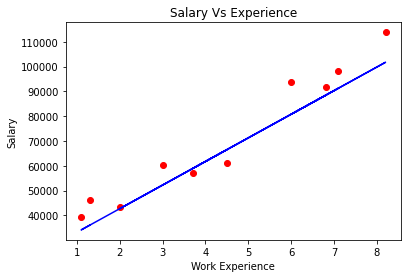

In [26]:
plt.scatter(X_test, Y_test, color="red")
plt.plot(X_test, test_data_prediction, color="blue")
plt.xlabel("Work Experience")
plt.ylabel("Salary")
plt.title("Salary Vs Experience")
plt.show()